# Car price prediction case study

#### The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model

#### Data description
The business meaning of each column in the data is as below

Price: The Price of the car in dollars

Age: The age of the car in months

KM: How many KMS did the car was used

FuelType: Petrol/Diesel/CNG car

HP: Horse power of the car

MetColor: Whether car has metallic color or not

Automatic: Whether car has automatic transmission or not

CC: The engine size of the car

Doors: The number of doors in the car

Weight: The weight of the car

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\excel data\CarPricesData.csv")
data.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [3]:
data.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1432,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.986750,68533.259749,NaN,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,NaN,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [4]:
data.isna().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [5]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [6]:
#missing value treatment

In [7]:
data[data.Age.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
38,15750,NaN,25329,Petrol,97,1,0,1400.0,3,1100.0
73,15750,NaN,28227,Petrol,97,1,0,1400.0,5,1110.0


In [8]:
df_tu= data[data.HP==98]
df_tu

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
169,17795,9.0,1,Petrol,98,1,0,1400.0,4,1065.0
184,17795,1.0,1,Petrol,98,1,0,1400.0,4,1100.0


In [9]:
data[data.CC.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1392,7500,79.0,49827,Petrol,86,1,0,NaN,5,1035.0
1401,8950,71.0,47633,Petrol,110,1,0,NaN,5,1075.0


In [10]:
data[data.HP==73]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1078,7950,71.0,139145,Diesel,73,0,0,2000.0,2,1115.0


In [11]:
data[data.FuelType=='CNG']

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
189,7750,43.0,178858,CNG,110,0,0,1600.0,3,1084.0
199,11950,39.0,98823,CNG,110,1,0,1600.0,5,1119.0
209,11950,37.0,82743,CNG,110,1,0,1600.0,5,1121.0
223,14950,44.0,71793,CNG,110,1,0,1600.0,4,1067.0
296,12950,44.0,41499,CNG,110,1,0,1600.0,5,1103.0
383,8500,55.0,150000,CNG,110,1,0,1600.0,3,1075.0
387,9250,48.0,142130,CNG,110,0,0,1600.0,5,1119.0
436,11500,47.0,78785,CNG,110,1,0,1600.0,5,1119.0
618,8450,64.0,144000,CNG,110,1,0,1600.0,3,1065.0
622,8950,59.0,137050,CNG,110,1,0,1600.0,3,1078.0


In [12]:
""" from above pattern, we conclude that when HP =69,72,73 then FuelType is Diesel and when HP = 86,192,97,98,116,107 Then,
fueltype is petrol"""

data['FuelType'] = np.where(data.HP==86,'Petrol',data.FuelType)
data['FuelType'] = np.where(data.HP==192,'Petrol',data.FuelType)
data['FuelType'] = np.where(data.HP==97,'Petrol',data.FuelType)
data['FuelType'] = np.where(data.HP==98,'Petrol',data.FuelType)
data['FuelType'] = np.where(data.HP==116,'Petrol',data.FuelType)
data['FuelType'] = np.where(data.HP==107,'Petrol',data.FuelType)
data['FuelType'] = np.where(data.HP==69,'Diesel',data.FuelType)
data['FuelType'] = np.where(data.HP==72,'Diesel',data.FuelType)
data['FuelType'] = np.where(data.HP==73,'Diesel',data.FuelType)

In [13]:
# when HP is 110 we see that fueltype is petrol and CNG both.so, we are not sure to fill any type of fuel
data.FuelType.fillna('NA',inplace = True)

In [14]:
# from pattern we observe that when HP = 110, cc is 1600 and when HP = 86,CC is 1300.
data['CC'] = np.where(data.HP==110,1600.0,data.CC)
data['CC'] = np.where(data.HP==86,1300.0,data.CC)

In [15]:
data.Age.fillna(0,inplace=True)

In [16]:
#outlier treatment

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


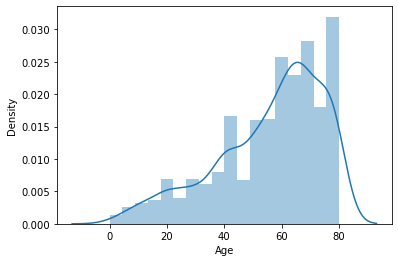

In [17]:
sns.distplot(data.Age)
plt.show()

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


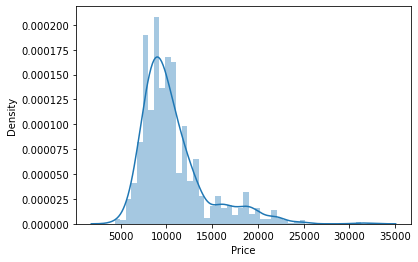

In [18]:
sns.distplot(data.Price)
plt.show()

<AxesSubplot:>

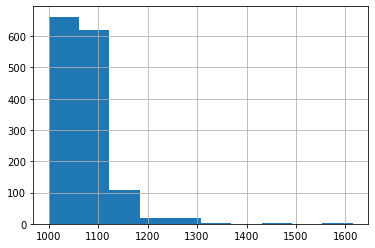

In [19]:
data.Weight.hist()

In [20]:
data.Weight.describe()

count    1434.000000
mean     1072.487448
std        52.672475
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1615.000000
Name: Weight, dtype: float64

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


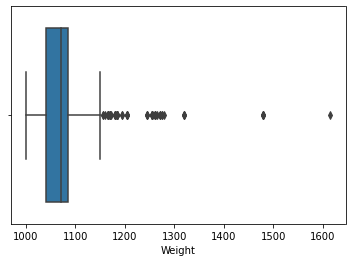

In [21]:
sns.boxplot(data.Weight)
plt.show()

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

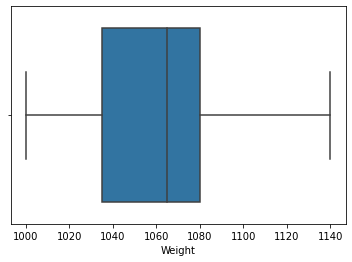

In [22]:
data=data[data['Weight']<1150]
sns.boxplot(data.Weight)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


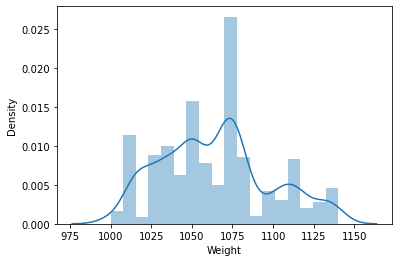

In [23]:
sns.distplot(data.Weight)
plt.show()

<AxesSubplot:>

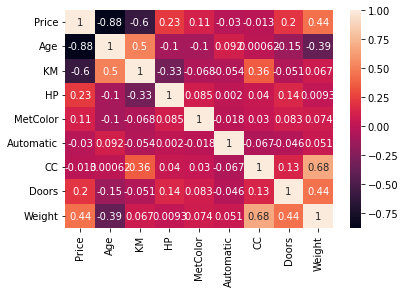

In [24]:
sns.heatmap(data.corr(),annot=True)

In [25]:
# some information from this data 

Q. what is the maximum price in each type of HP?


In [26]:
data_HP = data.groupby('HP').Price.agg('max')
data_HP

HP
69     13950
71     18500
72     12250
73      7950
86     13750
90      9500
97     21125
98     17795
107    12500
110    24500
116    11900
Name: Price, dtype: int64

Q.what is the maximum weight in each type of CC?

In [27]:
data_CC = data.groupby('CC').Price.agg('max')
data_CC

CC
1300.0    13750
1398.0    11500
1400.0    21125
1587.0    10500
1600.0    24500
1800.0     4750
1900.0    13950
2000.0    12250
Name: Price, dtype: int64

Q. what is the number of each fueltype of car? 

In [28]:
data.FuelType.value_counts()

Petrol    1236
Diesel     106
CNG         17
NA           2
Name: FuelType, dtype: int64

Q.which car has driven least?

In [29]:
data.KM.min()

1

Q.what is the maximum price of automatic car?

In [30]:
df_automated = data.groupby('Automatic').Price.agg('max')
df_automated

Automatic
0    24500
1    14950
Name: Price, dtype: int64

In [33]:
data = pd.get_dummies(data)
data

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,17950,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1
18,16750,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,0,1
19,16950,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,0,1
20,15950,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,0,1


In [34]:
X = data.drop(columns = 'Price')
Y = data['Price']
X.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1
18,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,0,1
19,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,0,1
20,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,0,1


In [35]:
## train and test split


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
pred = MinMaxScaler()
fit = pred.fit(X)
X = fit.transform(X)
X

array([[0.2875    , 0.29274606, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.3       , 0.08936251, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.3       , 0.10519385, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8875    , 0.07002086, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       [0.875     , 0.06960934, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       [0.95      , 0.        , 0.87234043, ..., 0.        , 0.        ,
        1.        ]])

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
X_train

array([[0.8625    , 0.30688192, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.9       , 0.36419491, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.925     , 0.65805621, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.975     , 0.29666377, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.7625    , 0.56360314, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.7125    , 0.33114951, 0.87234043, ..., 0.        , 0.        ,
        1.        ]])

In [39]:
X_test

array([[0.875     , 0.35802205, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.775     , 0.36213729, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       [0.925     , 0.50648768, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8125    , 0.34797263, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.9875    , 0.40634324, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.7625    , 0.18352339, 0.36170213, ..., 0.        , 0.        ,
        1.        ]])

In [40]:
##modeling

In [41]:
from sklearn.linear_model import LinearRegression

RegModel = LinearRegression()
fit= RegModel.fit(X_train,Y_train)
y_pred=fit.predict(X_test)

In [42]:
pd.DataFrame(y_pred)

,0
0,7922.205454
1,8768.482700
2,6745.334057
3,10702.438228
4,9463.172880
...,...
268,12777.834181
269,9007.072995
270,10904.295514
271,7928.430939


In [43]:
pd.DataFrame(Y_test)

,Price
1208,7950
724,6900
1103,7950
989,9950
867,9750
...,...
313,11650
659,10500
734,10950
1159,8750


In [44]:
from sklearn import metrics
print('R2_score',metrics.r2_score(Y_test,y_pred))

R2_score 0.8471572960275175


In [45]:
#model2
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor()
fit = RegModel.fit(X_train,Y_train)
Y_pred = fit.predict(X_test)
print('r2_score',metrics.r2_score(Y_test,Y_pred))
pd.DataFrame(Y_pred)


r2_score 0.7890722654193759


,0
0,7450.0
1,8750.0
2,7950.0
3,10495.0
4,9950.0
...,...
268,13950.0
269,9750.0
270,10500.0
271,9500.0


In [46]:
#model3
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor()
fit = RegModel.fit(X_train,Y_train)
Y_pred = fit.predict(X_test)
print('r2_score',metrics.r2_score(Y_test,Y_pred))
pd.DataFrame(Y_pred)

r2_score 0.8742938702036944


,0
0,7848.99
1,8945.90
2,7132.95
3,9717.75
4,9991.40
...,...
268,12327.95
269,9274.39
270,9889.90
271,8082.90


In [47]:
#model4
from sklearn.ensemble import AdaBoostRegressor
DTR = RandomForestRegressor()
model = AdaBoostRegressor(n_estimators = 100,base_estimator=DTR,learning_rate = 0.04)
fit = model.fit(X_train,Y_train)
Y_pred = fit.predict(X_test)
print('r2_score',metrics.r2_score(Y_test,Y_pred))
pd.DataFrame(Y_pred)

r2_score 0.8777734645407843


,0
0,7922.00
1,9000.40
2,7121.65
3,9783.90
4,10102.00
...,...
268,12352.70
269,9374.47
270,9905.95
271,8082.80


In [48]:
#model 4
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor()
fit= final_model.fit(X_train,Y_train)
Y_pred_final=fit.predict(X_test)

print('R2 score',metrics.r2_score(Y_train,fit.predict(X_train)))
print('R2 score',metrics.r2_score(Y_test,Y_pred_final))

R2 score 0.9832072148828146
R2 score 0.8767179054552493


In [49]:
data.corr()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
Price,1.000000,-0.879118,-0.598447,0.229229,0.107950,-0.029610,-0.012986,0.201637,0.435891,-0.034446,-0.154968,-0.008244,0.158138
Age,-0.879118,1.000000,0.503338,-0.102598,-0.104782,0.091600,0.000617,-0.151186,-0.390328,-0.006060,0.045091,-0.001747,-0.039279
KM,-0.598447,0.503338,1.000000,-0.326902,-0.067687,-0.053640,0.358502,-0.051427,0.067037,0.150121,0.484407,0.013988,-0.509076
HP,0.229229,-0.102598,-0.326902,1.000000,0.084814,0.001982,0.040460,0.140813,0.009341,0.079857,-0.672941,0.027239,0.590113
MetColor,0.107950,-0.104782,-0.067687,0.084814,1.000000,-0.018161,0.030212,0.083052,0.073556,0.021651,-0.032168,0.026649,0.017988
Automatic,-0.029610,0.091600,-0.053640,0.001982,-0.018161,1.000000,-0.066563,-0.045524,0.051311,0.004166,-0.067162,-0.008865,0.061895
CC,-0.012986,0.000617,0.358502,0.040460,0.030212,-0.066563,1.000000,0.129484,0.676797,0.033298,0.706243,0.011358,-0.669648
Doors,0.201637,-0.151186,-0.051427,0.140813,0.083052,-0.045524,0.129484,1.000000,0.437815,0.010611,0.002999,-0.001126,-0.006714
Weight,0.435891,-0.390328,0.067037,0.009341,0.073556,0.051311,0.676797,0.437815,1.000000,0.113865,0.500161,-0.007621,-0.506886
FuelType_CNG,-0.034446,-0.006060,0.150121,0.079857,0.021651,0.004166,0.033298,0.010611,0.113865,1.000000,-0.032686,-0.004314,-0.353654


In [50]:
,ṁṇdata

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,17950,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1
18,16750,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,0,1
19,16950,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,0,1
20,15950,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,0,1


In [51]:
## features engineering
x=data.drop(columns=['Price','CC','FuelType_NA'])
y=data['Price']

x.head(2)

,Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
9,23.0,71138,69,0,0,3,1105.0,0,1,0
17,24.0,21716,110,1,0,3,1105.0,0,0,1


In [52]:
pred = MinMaxScaler()
fit= pred.fit(x)
x= fit.transform(x)
x

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

x_train

x_test

### Model3
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor()
fit= final_model.fit(x_train,y_train)
y_pred_final=fit.predict(x_test)

print('Base model accuracies',0.8744112420928829)

# print('R2 score',metrics.r2_score(y_train,fit.predict(x_train)) )
print('R2 score',metrics.r2_score(y_test,y_pred_final) )


##gridsearch cv or randomize search cv

Base model accuracies 0.8744112420928829
R2 score 0.8740287232647574


In [53]:
#deploy
# 1. flask api
# 2. prediction
# 3. final model

In [54]:
# save
import joblib
joblib.dump(fit, "car_price_final_model.joblib")

['car_price_final_model.joblib']

In [55]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("car_price_final_model.joblib")

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361 entries, 9 to 1435
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1361 non-null   int64  
 1   Age              1361 non-null   float64
 2   KM               1361 non-null   int64  
 3   HP               1361 non-null   int64  
 4   MetColor         1361 non-null   int64  
 5   Automatic        1361 non-null   int64  
 6   CC               1361 non-null   float64
 7   Doors            1361 non-null   int64  
 8   Weight           1361 non-null   float64
 9   FuelType_CNG     1361 non-null   uint8  
 10  FuelType_Diesel  1361 non-null   uint8  
 11  FuelType_NA      1361 non-null   uint8  
 12  FuelType_Petrol  1361 non-null   uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 111.6 KB


In [57]:
### prediction code
import pandas as pd
Age= float(input('Enter age of your car'))
KM= int(input('Enter number of km'))
FuelType= input('fuel type of your car:-Diesel, Petrol or CNG ')
HP= int(input('Enter value of HP'))
MetColor= int(input('Enter the value for metcolor'))
Automatic= int(input('Enter the value for Automatic'))
Doors= int(input('Enter the value for Doors'))
Weight= float(input('Enter the value for weight'))

# # input_series= pd.Series([Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType])
# input_indexes = pd.Series['Age','KM','HP','MetColor','Automatic','Doors','Weight','FuelType']

#Creating a dictionary by passing Series objects as values
frame = {'Age':[Age],'KM':[KM],'HP':[HP],'MetColor':[MetColor],'Automatic':[Automatic],'Doors':[Doors],'Weight':[Weight],'FuelType':[FuelType]}
#Creating DataFrame by passing Dictionary
Test_data = pd.DataFrame.from_dict(frame)
# #Printing elements of Dataframe
# print(result)
Test_data

Enter age of your car25.2
Enter number of km45755
fuel type of your car:-Diesel, Petrol or CNG Diesel
Enter value of HP90
Enter the value for metcolor1
Enter the value for Automatic0
Enter the value for Doors3
Enter the value for weight1165.2


,Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType
0,25.2,45755,90,1,0,3,1165.2,Diesel


In [58]:
### prediction

def predciction_code(Test_data):
    test=pd.get_dummies(Test_data)
    if 'FuelType_Diesel' not in test.columns:
        test['FuelType_Diesel'] = 0
    if 'FuelType_Petrol' not in test.columns:
        test['FuelType_Petrol'] = 0
    if 'FuelType_CNG' not in test.columns:
        test['FuelType_CNG'] = 0

    pred = MinMaxScaler()
    fit= pred.fit(x)
    test= fit.transform(test)
    pred_new=loaded_rf.predict(test)
    return pred_new

predciction_code(Test_data)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([6181.9])